In [1]:
import pickle, gzip
import numpy as np
import matplotlib.pyplot as plt

f = gzip.open('mnist.pkl.gz', 'rb')
train_set, valid_set, test_set = pickle.load(f ,encoding='latin1')
f.close()

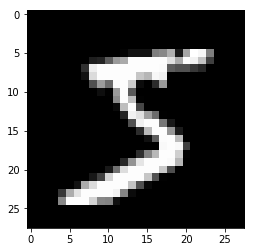

In [2]:
image0 = train_set[0][0]
image0 = image0.reshape((28, 28))

plt.imshow(image0, cmap='gray')
plt.show()

In [3]:
from sklearn.linear_model import Perceptron
clf = Perceptron()
clf.fit(train_set[0], train_set[1])
pred_v = clf.predict(valid_set[0])
from sklearn.metrics import classification_report
print(classification_report(valid_set[1], pred_v))

/home/akera/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.96      0.95      0.95       991
           1       0.97      0.95      0.96      1064
           2       0.89      0.89      0.89       990
           3       0.79      0.90      0.84      1030
           4       0.96      0.80      0.88       983
           5       0.97      0.50      0.66       915
           6       0.92      0.95      0.94       967
           7       0.87      0.95      0.91      1090
           8       0.70      0.90      0.79      1009
           9       0.81      0.88      0.85       961

   micro avg       0.87      0.87      0.87     10000
   macro avg       0.89      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



In [4]:
def transform_y_vectors(y_vec, new_dim=10):
    l = len(y_vec)
    new_y = np.zeros((l, new_dim))
    for i, y_val in enumerate(y_vec):
        new_y[i][y_val] = 1
    
    return new_y

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation

train_set_label = transform_y_vectors(train_set[1])
valid_set_label = transform_y_vectors(valid_set[1])

model = Sequential()
model.add(Dense(units=256, input_dim=784))
model.add(Activation('relu'))
model.add(Dense(units=128))
model.add(Activation('relu'))
model.add(Dense(units=56))
model.add(Activation('relu'))
model.add(Dense(units=10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(train_set[0], train_set_label,epochs=10, batch_size=32)

result = model.evaluate(valid_set[0], valid_set_label, batch_size=128)

print ("Loss on valid set:"  + str(result[0]) + " Accuracy on valid set: " + str(result[1]))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
50000/50000 [==============================] - 7s 140us/step - loss: 0.6710 - acc: 0.8119
Epoch 2/10
50000/50000 [==============================] - 6s 128us/step - loss: 0.2777 - acc: 0.9206
Epoch 3/10
50000/50000 [==============================] - 7s 133us/step - loss: 0.2174 - acc: 0.9373
Epoch 4/10
50000/50000 [==============================] - 6s 129us/step - loss: 0.1795 - acc: 0.9473
Epoch 5/10
50000/50000 [==============================] - 6s 126us/step - loss: 0.1526 - acc: 0.9558
Epoch 6/10
50000/50000 [==============================] - 6s 126us/step - loss: 0.1323 - acc: 0.9619
Epoch 7/10
50000/50000 [==============================] - 6s 127us/step - loss: 0.1161 - acc: 0.9660
Epoch 8/10
50000/50000 [==============================] - 6s 128us/step - loss: 0.1032 - acc: 0.9705
Epoch 9/10
50000/50000 [==============================] - 6s 126us/step 

In [6]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo ,encoding='latin1')#, encoding='bytes')
    return dict

In [10]:
# cifar10 = unpickle('../../../cifar-10-batches-py/data_batch_1')
cifar10 = unpickle('../../cifar-10-batches-py/data_batch_1')
cimage = cifar10['data']
clabel = cifar10['labels']

for i in range(2, 6):
    cifar10 = unpickle('../../cifar-10-batches-py/data_batch_'+str(i))
    cimage = np.concatenate((cimage, cifar10['data']))
    clabel = np.concatenate((clabel, cifar10['labels']))

In [11]:
from sklearn.model_selection import train_test_split
cimage_t, cimage_v, clabel_t, clabel_v = train_test_split(cimage, clabel, test_size=0.2)

In [12]:
from sklearn.linear_model import Perceptron
clf = Perceptron()
clf.fit(cimage_t, clabel_t)
pred_v = clf.predict(cimage_v)
from sklearn.metrics import classification_report
print(classification_report(clabel_v, pred_v))

/home/akera/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.29      0.00      0.01      1016
           1       0.61      0.24      0.34       998
           2       0.12      0.86      0.22      1018
           3       0.22      0.01      0.02      1008
           4       0.50      0.00      0.01       958
           5       0.31      0.08      0.13      1030
           6       0.51      0.03      0.06      1026
           7       0.58      0.03      0.05       979
           8       0.28      0.58      0.38       974
           9       0.57      0.05      0.09       993

   micro avg       0.19      0.19      0.19     10000
   macro avg       0.40      0.19      0.13     10000
weighted avg       0.40      0.19      0.13     10000



In [13]:
from keras.models import Sequential
from keras.layers import Dense, Activation

clabel_t = transform_y_vectors(clabel_t)
clabel_v = transform_y_vectors(clabel_v)

model = Sequential()
model.add(Dense(units=2048, input_dim=3072))
model.add(Activation('relu'))
model.add(Dense(units=1024))
model.add(Activation('relu'))
model.add(Dense(units=512))
model.add(Activation('relu'))
model.add(Dense(units=256))
model.add(Activation('relu'))
model.add(Dense(units=10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(cimage_t, clabel_t,epochs=10, batch_size=32)

result = model.evaluate(cimage_v, clabel_v, batch_size=128)

print ("Loss on valid set:"  + str(result[0]) + " Accuracy on valid set: " + str(result[1]))

Epoch 1/10
40000/40000 [==============================] - 132s 3ms/step - loss: 14.5129 - acc: 0.0995
Epoch 2/10
40000/40000 [==============================] - 125s 3ms/step - loss: 14.5127 - acc: 0.0996
Epoch 3/10
40000/40000 [==============================] - 113s 3ms/step - loss: 14.5127 - acc: 0.0996
Epoch 4/10
40000/40000 [==============================] - 110s 3ms/step - loss: 14.5127 - acc: 0.0996
Epoch 5/10
40000/40000 [==============================] - 111s 3ms/step - loss: 14.5127 - acc: 0.0996
Epoch 6/10
40000/40000 [==============================] - 111s 3ms/step - loss: 14.5127 - acc: 0.0996
Epoch 7/10
40000/40000 [==============================] - 111s 3ms/step - loss: 14.5127 - acc: 0.0996
Epoch 8/10
40000/40000 [==============================] - 112s 3ms/step - loss: 14.5127 - acc: 0.0996
Epoch 9/10
40000/40000 [==============================] - 111s 3ms/step - loss: 14.5127 - acc: 0.0996
Epoch 10/10
10000/10000 [==============================] - 4s 428us/step
Loss on v